<a href="https://colab.research.google.com/github/miray-ban/Python-snake-game/blob/main/TP1_TI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello hello ✳ in this file I will solve problems related to images**





# 1. Using Numpy and OpenCv libraries in Python





try the first example in tp


In [15]:
import numpy as np

In [16]:
x = np.arange(0,1,0.1)
#x=np.linspace(0,10,100)
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [17]:
x.shape


(10,)

In [18]:
x=np.linspace(0,10,100)
print(x)


[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [19]:
x.shape

(100,)

In [20]:
y=x*x

In [21]:
print ( "cos(pi)=",np.cos(np.pi))

cos(pi)= -1.0


In [22]:
tab_cosinus= np.cos(x)

In [23]:
maListe=[0,1,2]
monTableau=np.array(maListe)
print(monTableau)

[0 1 2]


# 2. Histogram construction/manipulation for luminance correction

**1.1) Loading and Visualizing the Image**

 We'll load the image using OpenCV and then visualize it to understand how the image looks.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow




In [7]:
my_image = cv2.imread('/content/images/dark_lena.png', cv2.IMREAD_GRAYSCALE)


i have a small probleme in fucntion cv2.read() that why i choice other methode forvisualize the image but is the same just i replace cv2.imshow to cv2_imshow() and add imprtetion cv2_imshow

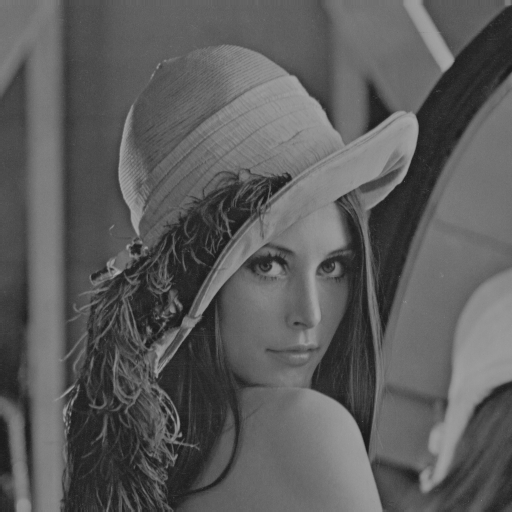

In [8]:
cv2_imshow(my_image)



Observation: When visualizing the image, it might appear dark due to low luminance. This is the issue we aim to correct.



**1.2) Computing and Visualizing the Histogram of the Image**

1.Compute the histogram of the image using OpenCV:


In [9]:
hist = cv2.calcHist([my_image], [0], None, [256], [0, 256])


2.Visualize the histogram using matplotlib:


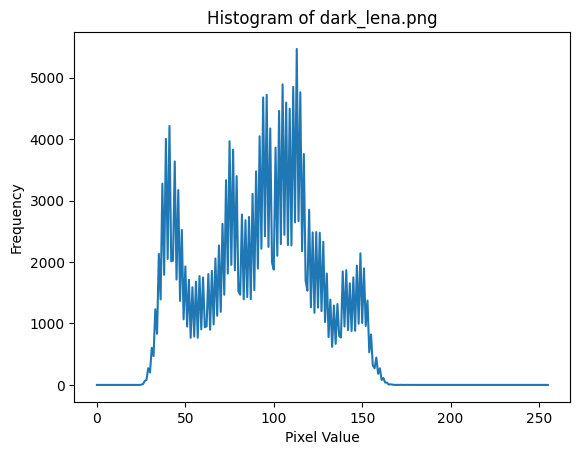

In [12]:
plt.figure()
plt.title("Histogram of dark_lena.png")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist)
plt.show()

This code will display a histogram plot showing the distribution of pixel intensities in the dark_lena.png image.

Observation: The histogram  skewed to the left, indicating that most pixel values are low, which   that the image appears dark.



**1.4) Correcting the Luminance of the Image**

To stretch the luminance of the image and correct it, you can perform histogram stretching, also known as contrast stretching. This technique stretches the intensity range of the image to cover a wider range of pixel values, thus improving the contrast and luminance.

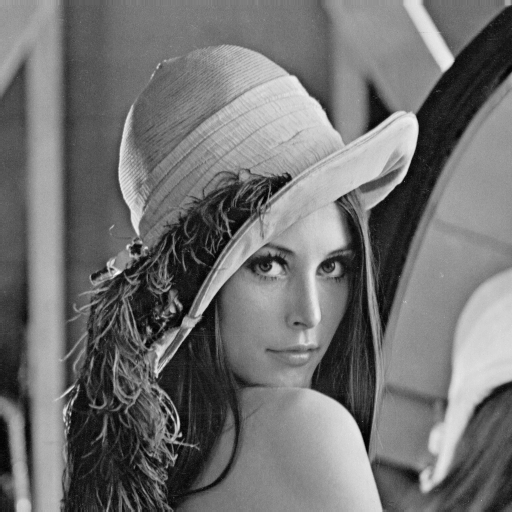

In [13]:
min_pixel_value = np.min(my_image)
max_pixel_value = np.max(my_image)

stretched_image = ((my_image - min_pixel_value) / (max_pixel_value - min_pixel_value)) * 255
stretched_image = stretched_image.astype(np.uint8)

cv2_imshow(stretched_image)


n this code, we compute the minimum and maximum pixel values of the image and then perform a linear transformation to stretch the pixel values to cover the full intensity range (0-255) using the formula (pixel_value - min_pixel_value) / (max_pixel_value - min_pixel_value) * 255

**1.5) Compute the Histogram of the Resulted Image**

After stretching the image to correct its luminance, you can compute and visualize the histogram of the resulting image to observe the changes in pixel intensity distribution.

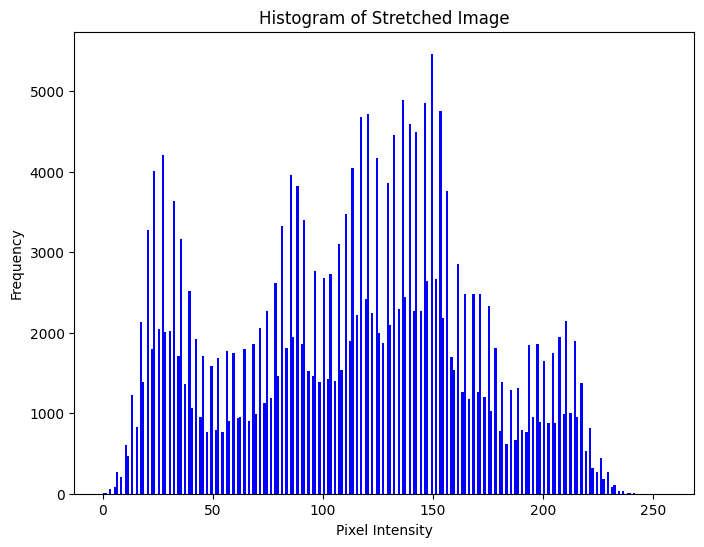

In [18]:
# Compute the histogram of the stretched image
hist_stretched, bins_stretched = np.histogram(stretched_image.ravel(), bins=256, range=[0, 256])

# Plot the histogram of the stretched image
plt.figure(figsize=(8, 6))
plt.hist(stretched_image.ravel(), bins=256, range=[0, 256], color='blue')
plt.title('Histogram of Stretched Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


This code will display the histogram of the stretched image using matplotlib. You can analyze the histogram to see if the stretching operation has resulted in a wider distribution of pixel intensities, indicating an improvement in the image's luminance and contrast.

# 3. Histogram construction/manipulation for contrast correction

Let's go through each question step by step:



**2.1) Loading the Weakly Contrasted Image**

1. Load the image from weak_contrasted.png in grayscale mode:



In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [22]:
my_image = cv2.imread('/content/images/weak_contrasted.png', cv2.IMREAD_GRAYSCALE)


2. Visualize the image using cv2_imshow to understand its initial state:


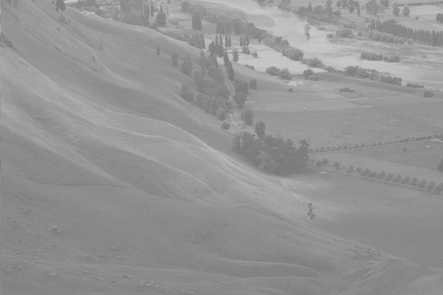

In [23]:
cv2_imshow(my_image)


**2.2) Computing the Histogram and Cumulative Histogram of the Image**

Explanation: Compute the histogram of the image to understand the distribution of pixel intensities, and compute the cumulative histogram, which is the running sum of the histogram.

1. Compute the histogram of the image using OpenCV:


In [ ]:
hist = cv2.calcHist([my_image], [0], None, [256], [0, 256])


2.  Compute the cumulative histogram:


In [ ]:
cumulative_hist = np.cumsum(hist)


3. Visualize the histogram and cumulative histogram using matplotlib:


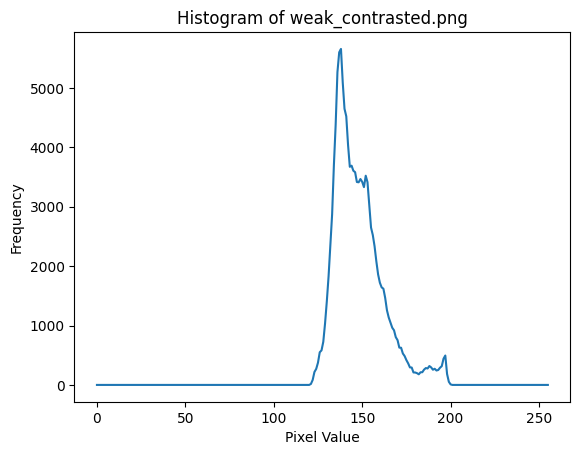

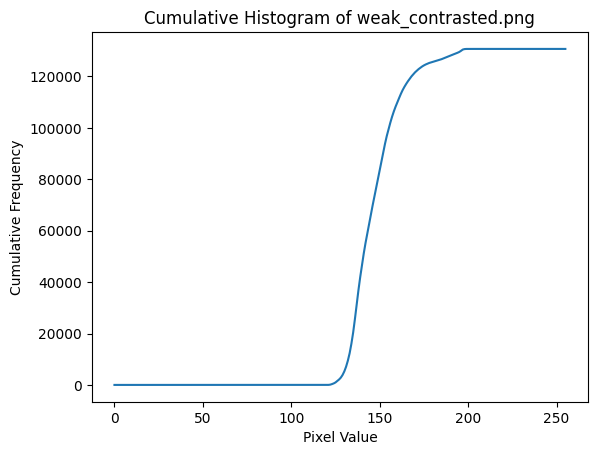

In [ ]:
# Plot the histogram
plt.figure()
plt.title("Histogram of weak_contrasted.png")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist)
plt.show()

# Plot the cumulative histogram
plt.figure()
plt.title("Cumulative Histogram of weak_contrasted.png")
plt.xlabel("Pixel Value")
plt.ylabel("Cumulative Frequency")
plt.plot(cumulative_hist)
plt.show()


**2.3) Normalizing the Cumulative Histogram**

Explanation: Normalize the cumulative histogram to bring values within the range [0, 255] by dividing each value in the cumulative histogram by the total number of pixels and then multiplying the result by 255.

1. Normalize the cumulative histogram:


In [ ]:
total_pixels = my_image.size  # Total number of pixels
normalized_cumulative_hist = cumulative_hist / total_pixels * 255


The normalized_cumulative_hist is the cumulative histogram normalized to the range [0, 255].


**2.4) Perform Histogram Equalization**
Explanation: Use the normalized cumulative histogram as a mapping from original grayscale values to new grayscale values. Apply this mapping to perform histogram equalization on the image.

1. Create a lookup table using the normalized cumulative histogram:


In [ ]:
lookup_table = np.uint8(normalized_cumulative_hist)


The lookup table maps original pixel values to new equalized pixel values.

2. Apply the lookup table to the image to perform histogram equalization:


In [ ]:
equalized_image = cv2.LUT(my_image, lookup_table)


3. Visualize the equalized image using cv2_imshow:


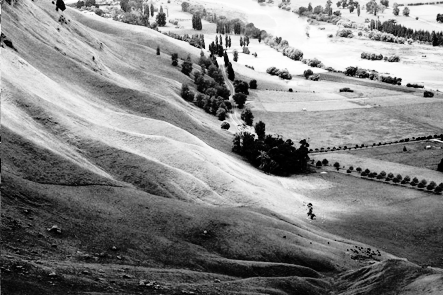

In [ ]:
cv2_imshow(equalized_image)


Comparison: Compare the equalized image with the original image. The equalized image should have improved contrast and brightness compared to the original weakly contrasted image.

**2.5) Plot the Histogram of the Resulted Image**
Explanation: Compute and visualize the histogram of the equalized image to observe the effects of the histogram equalization.


1. Compute the histogram of the equalized image:


In [ ]:
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])


2. Visualize the histogram of the equalized image using matplotlib:


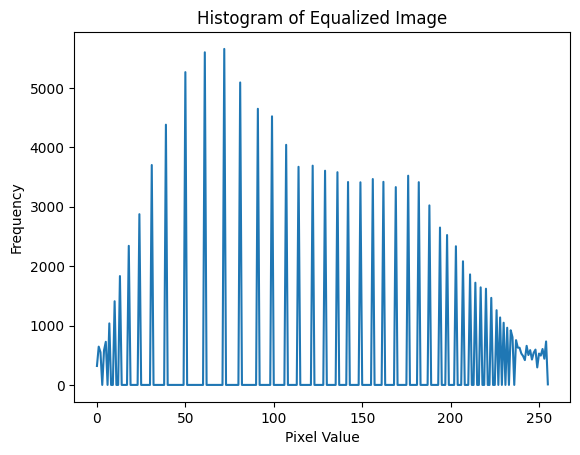

In [ ]:
plt.figure()
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized)
plt.show()


Remarks:

Uniform Distribution: The histogram of the equalized image should show a more uniform distribution of pixel intensities across the entire range from 0 to 255. This is because histogram equalization redistributes the pixel values more evenly.
Improved Contrast: The equalized histogram indicates that the contrast in the image has been enhanced, making light and dark areas of the image more discernible.

**2.6) Effects of Performing Both Processes**
Explanation: Perform histogram stretching followed by histogram equalization.

1. Perform histogram stretching: This process can improve the contrast of the image by stretching the range of pixel intensities.


In [ ]:
min_val = np.min(my_image)
max_val = np.max(my_image)

stretched_image = ((my_image - min_val) / (max_val - min_val)) * 255
stretched_image = np.uint8(stretched_image)


2. Apply histogram equalization to the stretched image:


In [ ]:
stretched_equalized_image = cv2.equalizeHist(stretched_image)


3. Visualize the resulted image using cv2_imshow:


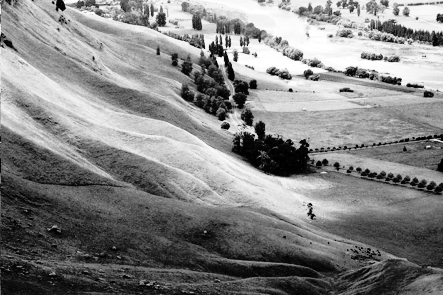

In [ ]:
cv2_imshow(stretched_equalized_image)


#4. Histogram construction/manipulation for colored contrast correction

first solution :
okeyy i will do my plan :
:

1. Load the Image:


*   Load the colored image "weak_colored_contrast.png" using OpenCV.


2- Convert to Grayscale:
* Convert the colored image to grayscale, as histogram equalization is typically applied to grayscale images.

3- Histogram Stretching:
* Perform histogram stretching on the grayscale image to expand the intensity range and improve contrast.

4-Histogram Equalization:
* Apply histogram equalization to the stretched grayscale image to further enhance contrast and distribute intensity values evenly.

5-Convert Back to Colored Image:
* Convert the equalized grayscale image back to a colored image to retain the original color information.
6-Visualize Results:
* Display the original colored image, the stretched grayscale image, the equalized grayscale image, and the final colored image with improved contrast.

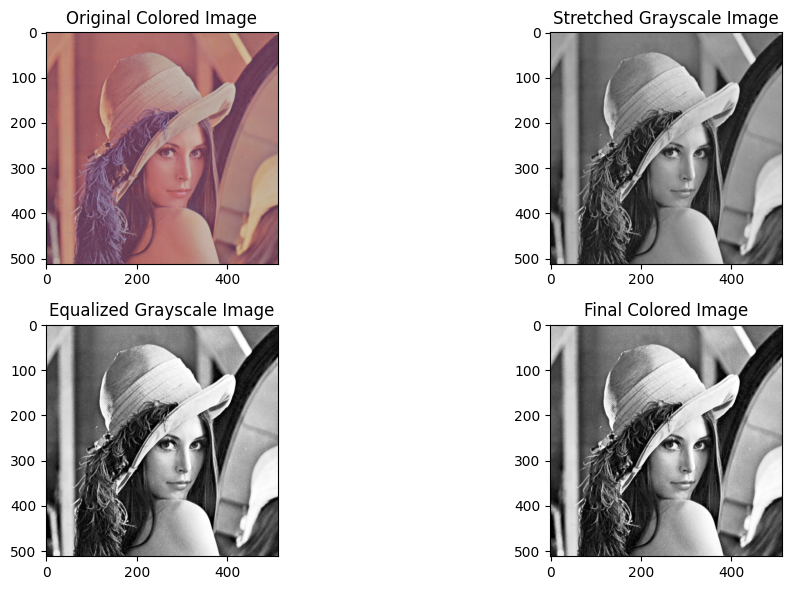

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/images/Lena_weak_v2.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_intensity = np.min(gray_image)
max_intensity = np.max(gray_image)
stretched_image = 255 * ((gray_image - min_intensity) / (max_intensity - min_intensity))

equalized_image = cv2.equalizeHist(stretched_image.astype(np.uint8))

final_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Colored Image')

plt.subplot(2, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Grayscale Image')

plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Grayscale Image')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Final Colored Image')

plt.tight_layout()
plt.show()


This code performs histogram stretching and equalization on the grayscale version of the colored image to improve contrast. The final result is a colored image with enhanced contrast compared to the original. Adjustments may be needed based on the specific characteristics of your image.







second solution :    


voici les etapes que je suivre :    

1. Chargement de l'image :
* L'image est chargée à partir du chemin spécifié dans la variable image_path à l'aide de la fonction cv2.imread.
2.Vérification du chargement de l'image :
* Le code vérifie si l'image a été chargée correctement en utilisant une condition if image is None:. Si l'image n'est pas chargée correctement, il affiche "Error loading image!".
3.Conversion en espace couleur LAB :
* L'image chargée est convertie de l'espace couleur BGR à l'espace couleur LAB à l'aide de cv2.cvtColor.
4.Séparation des canaux L, A et B :
* L'image LAB est séparée en ses composantes L (luminance), A (rouge-vert) et B (jaune-bleu) à l'aide de cv2.split.
5.Égalisation de l'histogramme adaptatif :
* L'égalisation de l'histogramme adaptatif est appliquée au canal L (luminance) pour améliorer le contraste de l'image à l'aide de cv2.createCLAHE et clahe.apply.
6.Recombinaison des canaux :
* Les canaux égalisés sont recombinés avec les canaux A et B pour former une image LAB améliorée à l'aide de cv2.merge.
7.Conversion en espace couleur BGR :
* L'image LAB améliorée est convertie de l'espace couleur LAB à l'espace couleur BGR à l'aide de cv2.cvtColor pour l'affichage avec Matplotlib.
8.Affichage des images :
* Les images originale et améliorée sont affichées côte à côte à l'aide de Matplotlib dans une figure avec deux sous-graphiques.
9.Affichage de la figure :
* La figure contenant les deux images est affichée à l'aide de plt.show().

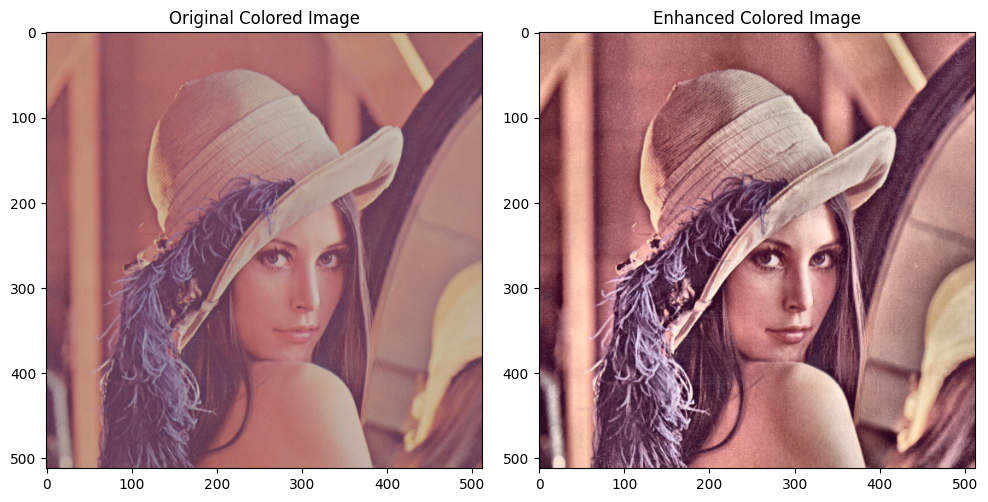

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/images/Lena_weak_v2.png'

image = cv2.imread(image_path)

if image is None:
    print("Error loading image!")
else:
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    l_channel, a_channel, b_channel = cv2.split(lab_image)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    equalized_l = clahe.apply(l_channel)

    enhanced_lab_image = cv2.merge((equalized_l, a_channel, b_channel))

    final_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Colored Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Colored Image')

    plt.tight_layout()
    plt.show()
